# Stock Market Prediction and Forecasting using Stacked LSTM

Performer- **Naman Sahu**

In [174]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [175]:
df= pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [176]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [178]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# Data Visualisation

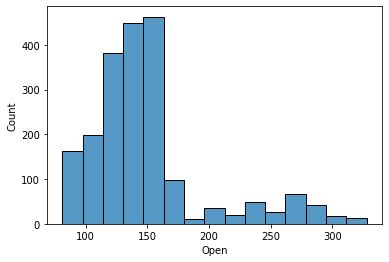

In [179]:
#plt.hist(df['Open'])
sns.histplot(data=df,x='Open',bins=15)

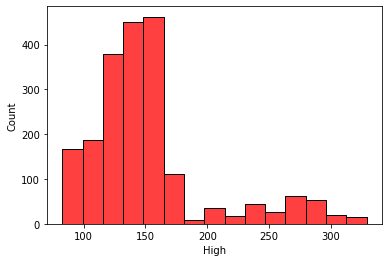

In [180]:
#plt.hist(df['High'],bins=20)
sns.histplot(data=df,x='High',bins=15,color='Red')

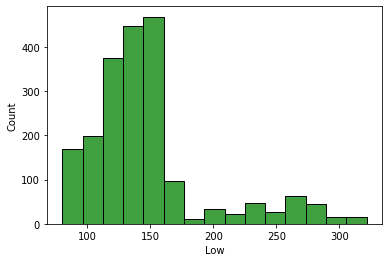

In [181]:
#plt.hist(df['Low'],bins=20)
sns.histplot(data=df,x='Low',bins=15,color='Green')

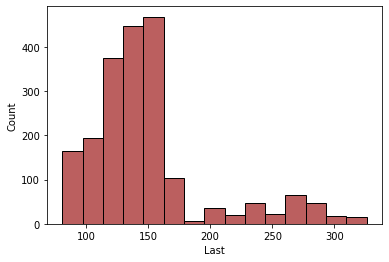

In [182]:
#plt.hist(df['Last'],bins=20)
sns.histplot(data=df,x='Last',bins=15,color='brown')

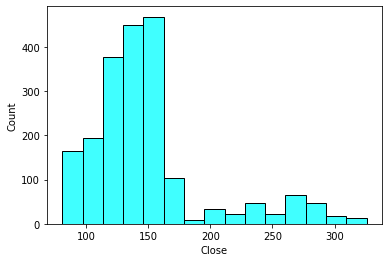

In [183]:
#plt.hist(df['Close'],bins=20)
sns.histplot(data=df,x='Close',bins=15,color='Cyan')

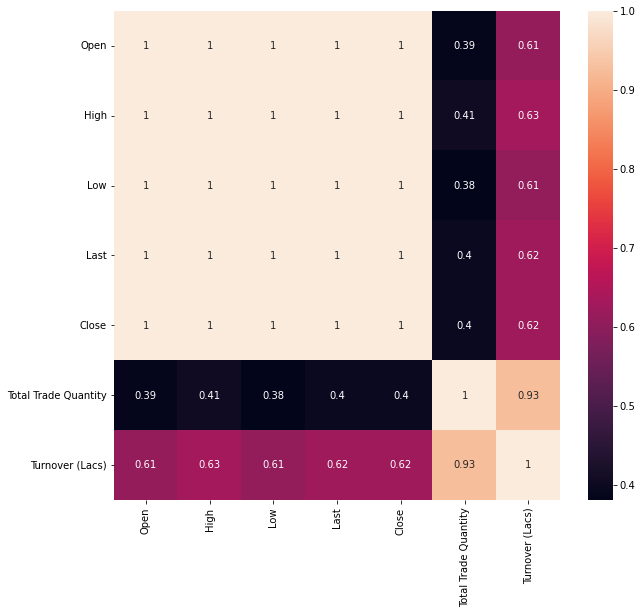

In [184]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,9))
sns.heatmap(corr, annot=True, ax=ax)

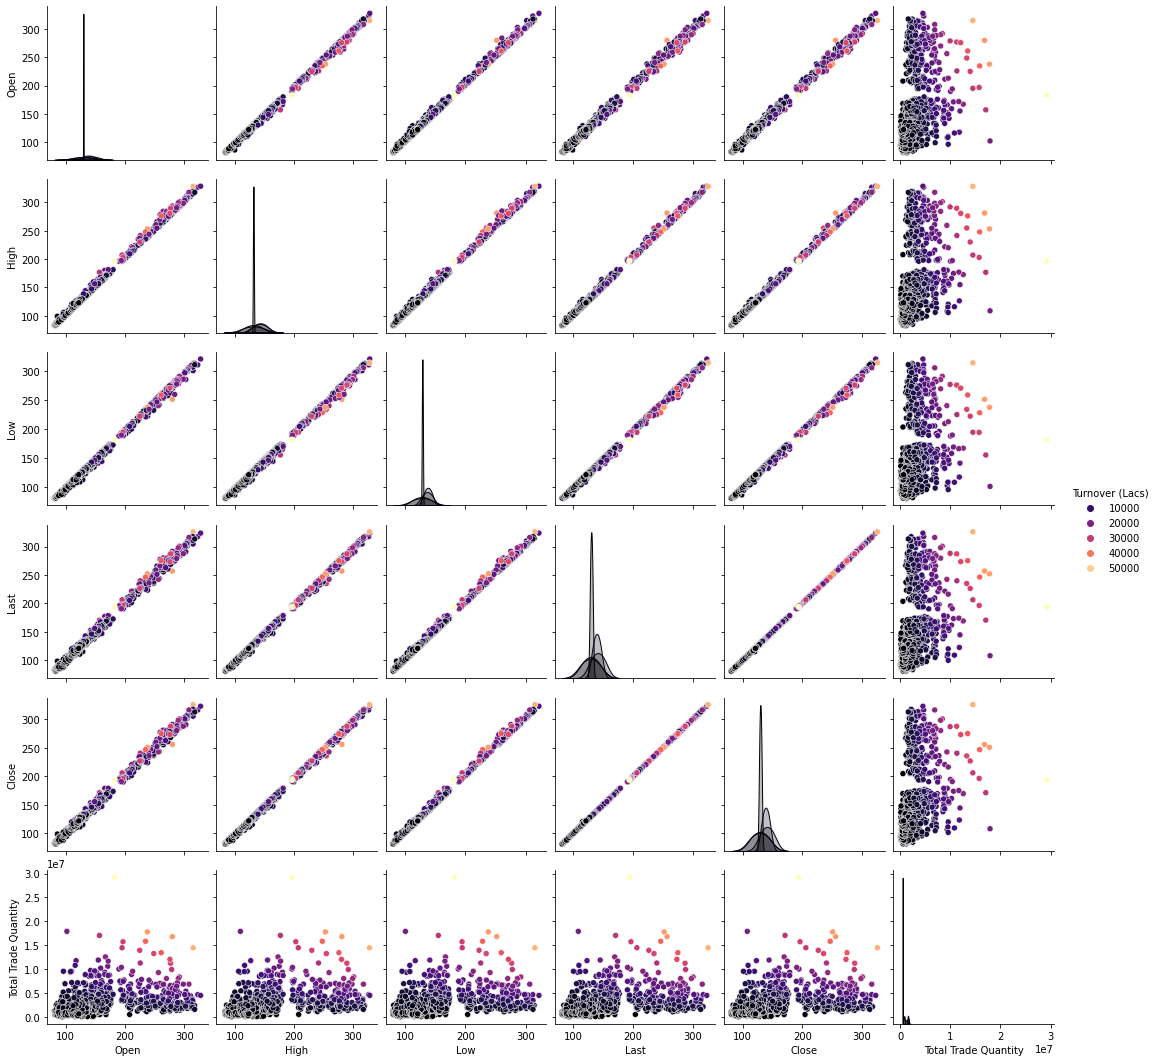

In [185]:
sns.pairplot(df, hue= 'Turnover (Lacs)', palette= "magma")
plt.show()

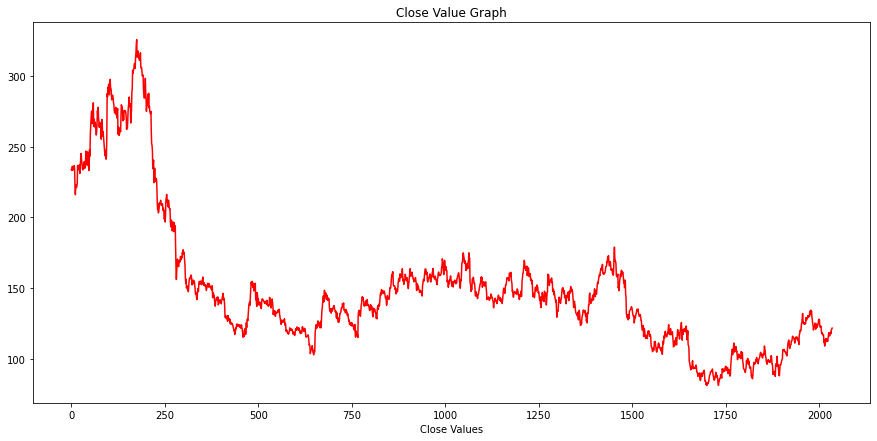

In [186]:
df_close = df.reset_index()['Close']
plt.figure(figsize=(15,7))
plt.plot(df_close,color='red')
plt.xlabel('Close Values')
plt.title('Close Value Graph')
plt.show()

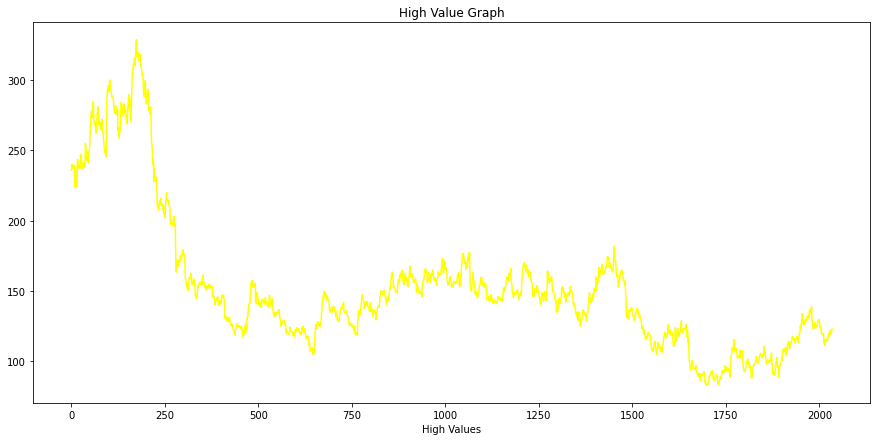

In [187]:
df_high = df.reset_index()['High']
plt.figure(figsize=(15,7))
plt.plot(df_high,color='yellow')
plt.xlabel('High Values')
plt.title('High Value Graph')
plt.show()

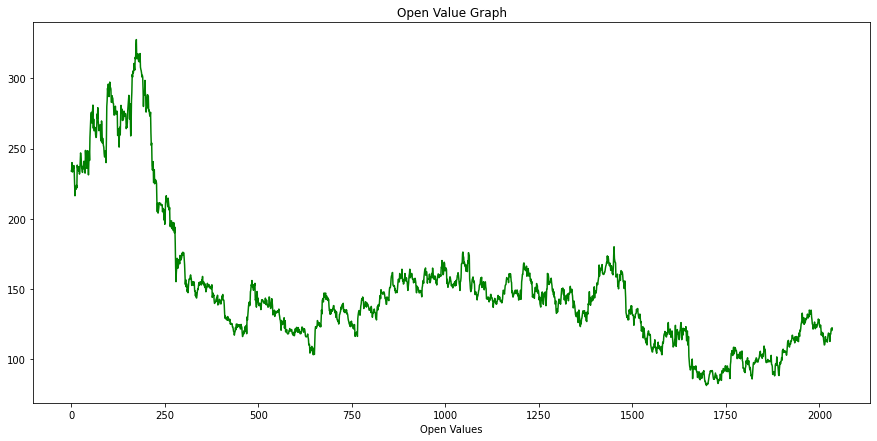

In [188]:
df_open = df.reset_index()['Open']
plt.figure(figsize=(15,7))
plt.plot(df_open,color='green')
plt.xlabel('Open Values')
plt.title('Open Value Graph')
plt.show()

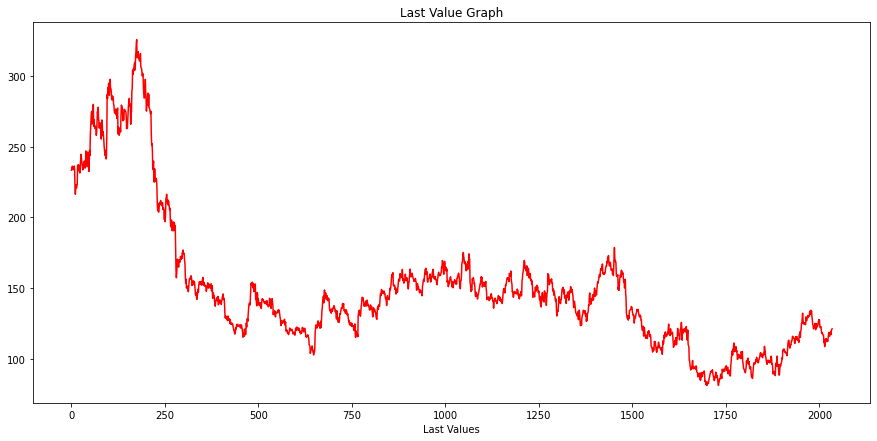

In [189]:
df_Last = df.reset_index()['Last']
plt.figure(figsize=(15,7))
plt.plot(df_Last,color='red')
plt.xlabel('Last Values')
plt.title('Last Value Graph')
plt.show()

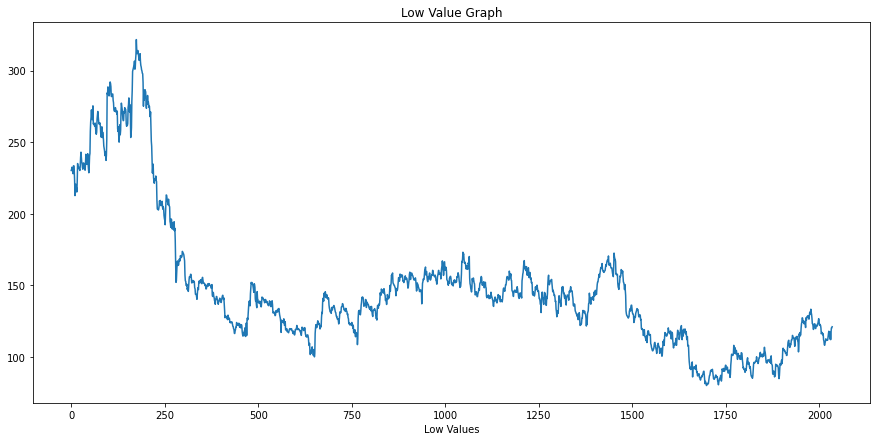

In [190]:
df_Low = df.reset_index()['Low']
plt.figure(figsize=(15,7))
plt.plot(df_Low)
plt.xlabel('Low Values')
plt.title('Low Value Graph')
plt.show()

In [191]:
from sklearn.preprocessing import MinMaxScaler 
MMS = MinMaxScaler(feature_range = (0,1))
df_High = MMS.fit_transform(np.array(df_high).reshape(-1,1))
df_High

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

In [192]:
training_size = int(len(df_High) * 0.75)
test_size = len(df_High) - training_size
train_data, test_data = df_High[0:training_size,:], df_High[training_size:len(df_high)]
print('Training Data :',train_data.size)
print('Training Data :',test_data.size)

Training Data : 1526
Training Data : 509


In [193]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [194]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# LSTM Model

In [195]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [196]:
print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(1425, 100, 1)
(1425,)
(408, 100, 1)
(408,)


(None, None)

In [197]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [198]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 13s 273ms/step - loss: 0.0288 - val_loss: 0.0064
Epoch 2/100
23/23 [==============================] - 6s 246ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 3/100
23/23 [==============================] - 6s 262ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/100
23/23 [==============================] - 6s 247ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 6s 264ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 6s 247ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
23/23 [==============================] - 6s 247ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
23/23 [==============================] - 6s 245ms/step - loss: 0.0012 - val_loss: 9.4554e-04
Epoch 9/100
23/23 [==============================] - 6s 244ms/step - loss: 0.0010 - val_loss: 9.2931e-04
Epoch 10/100
23/23 [==============================] - 6s 245ms/step - loss: 0.0010

# Prediction

In [199]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict = MMS.inverse_transform(train_predict)
test_predict = MMS.inverse_transform(test_predict)

In [200]:
math.sqrt(mean_squared_error(y_train, train_predict))

165.460867956163

In [201]:
math.sqrt(mean_squared_error(y_test, test_predict))

107.82984963618983

In [202]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_High)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_High)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

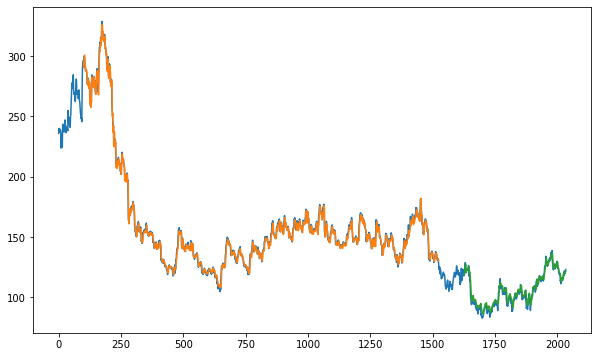

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [203]:
plt.figure(figsize=(10,6))
plt.plot(MMS.inverse_transform(df_High))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [204]:
print("Length of Test Data : ",len(test_data))
print("Shape of x Test Data :",x_test.shape)
x_input=test_data[409:].reshape(1,-1)
x_input.shape

Length of Test Data :  509
Shape of x Test Data : (408, 100, 1)


(1, 100)

In [205]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16188806]
101
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433

In [206]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)
print(day_new.shape)
print(day_pred.shape)

(100,)
(28,)


In [207]:
ds3 = df_High.tolist()
ds3.extend(lst_output)

len(df_High)

2035

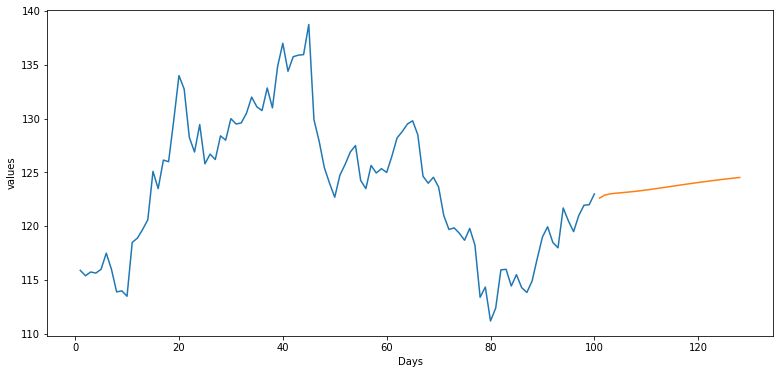

In [208]:
plt.figure(figsize=(13,6))

plt.plot(day_new, MMS.inverse_transform(df_High[1935:]))
plt.plot(day_pred, MMS.inverse_transform(lst_output))
plt.xlabel('Days')
plt.ylabel('values')

plt.show()

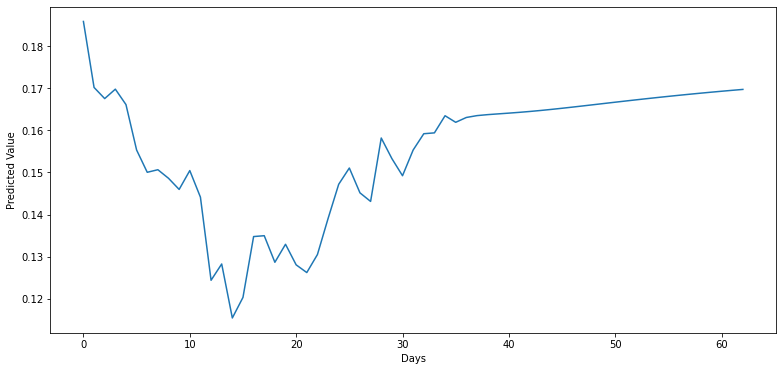

In [209]:
plt.figure(figsize=(13,6))

ds3=df_High.tolist()
ds3.extend(lst_output)
plt.plot(ds3[2000:])
plt.xlabel("Days")
plt.ylabel("Predicted Value")
plt.show()

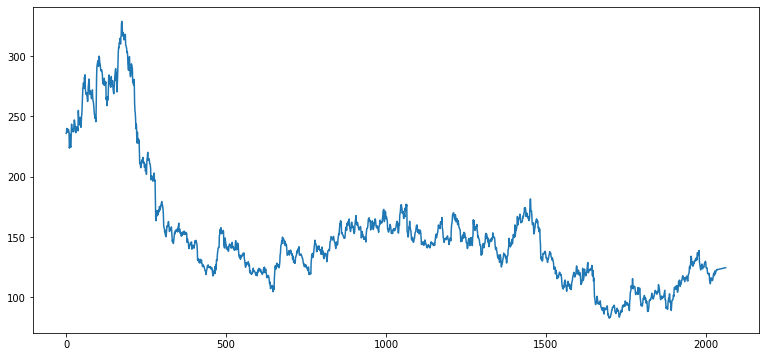

In [210]:
plt.figure(figsize=(13,6))

ds3=MMS.inverse_transform(ds3).tolist()
plt.plot(ds3)

plt.show()

# End of Task 2